# ANN & Fashion MNIST

<br> By Margaret Maynard-Reid, 4/24/2018

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## Why Fashion-MNIST?


*   MNIST is too easy
*   MNIST is overused
*   MNIST can not represent modern Computer Vision tasks

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data 반복실행 해보자

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 8 Bag


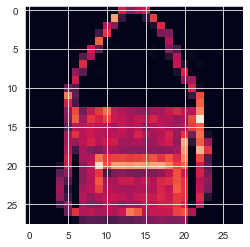

In [2]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",  # index 1
                        "Pullover",  # index 2
                        "Dress",  # index 3
                        "Coat",  # index 4
                        "Sandal",  # index 5
                        "Shirt",  # index 6
                        "Sneaker",  # index 7
                        "Bag",  # index 8
                        "Ankle boot"]  # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = np.random.randint(0, 59999)
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print("y = " + str(label_index) + " " + (fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [3]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


##  코딩 task!

1. 전처리
    * x : sc_____
    * y : _______ encoding

2. 모델링
    * model에 모델 선언
    * Input layer에 어떻게 전달할 것인지 고민 필요
    * 쭈우우우욱 늘려주는 레이어를 사용할 것 (F______)
    * 히든레이어는 최소 3개를 쓸 것!
    * 노드 수는 512개를 기본으로 시작
    * 자유롭게 바꿔가며 성능을 볼 것

3. 학습
    * epochs=50, validation_split=0.2
    * early stopping

In [4]:
x_train_s = x_train / 255
x_test_s = x_test / 255

y_train_o = keras.utils.to_categorical(y_train, 10)
y_test_o = keras.utils.to_categorical(y_test, 10)

In [5]:
#############
# Your Code #
#############
keras.backend.clear_session()

layers = [  ]
il = keras.layers.Input(shape=(28, 28), name='Input')
layers.append(il)
layers.append(keras.layers.Flatten()(layers[-1]))
for i in range(3):
    layers.append(keras.layers.Dense(512, activation='relu', name=f'Hidden_{i + 1}')(layers[-1]))
layers.append(keras.layers.Dense(10, activation='softmax', name='Output')(layers[-1]))

model = keras.models.Model(layers[0], layers[-1])
model_o = keras.models.Model(layers[0], layers[-1])

model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model_o.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   min_delta=0,
                                   patience=5,
                                   verbose=1,
                                   restore_best_weights=True)

print(model.summary())
print('-' * 100)
print(model_o.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Hidden_1 (Dense)             (None, 512)               401920    
_________________________________________________________________
Hidden_2 (Dense)             (None, 512)               262656    
_________________________________________________________________
Hidden_3 (Dense)             (None, 512)               262656    
_________________________________________________________________
Output (Dense)               (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
________________________________________________

In [6]:
model_o.fit(x_train_s, y_train_o, verbose=1, epochs=50,
          callbacks=[es],
          validation_split=.2)

Epoch 1/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4919 - accuracy: 0.8200 - val_loss: 0.4087 - val_accuracy: 0.8494
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3755 - accuracy: 0.8611 - val_loss: 0.3783 - val_accuracy: 0.8656
Epoch 3/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3330 - accuracy: 0.8771 - val_loss: 0.3696 - val_accuracy: 0.8695
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3114 - accuracy: 0.8859 - val_loss: 0.3499 - val_accuracy: 0.8748
Epoch 5/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2933 - accuracy: 0.8909 - val_loss: 0.3383 - val_accuracy: 0.8778
Epoch 6/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2783 - accuracy: 0.8964 - val_loss: 0.3239 - val_accuracy: 0.8832
Epoch 7/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2648 - accuracy: 0.9009 - val_loss: 0.3288 - val_accuracy:

In [7]:
pred_o = model_o.predict(x_test_s)
pred_to = model_o.predict(x_train_s)

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
print(f'학습 정확도: {accuracy_score(y_train, pred_to.argmax(axis=1)) * 100: .2f}%')
print(f'테스트 정확도: {accuracy_score(y_test, pred_o.argmax(axis=1))*100: .2f}%')

print(f'{model_o.evaluate(x_test_s, y_test_o)}')

학습 정확도:  91.15%
테스트 정확도:  87.95%
313/313 [==============================] - 0s 932us/step - loss: 0.3423 - accuracy: 0.8795
[0.342330664396286, 0.8794999718666077]


In [ ]:
#############
# Your Code #
#############


In [ ]:
#############
# Your Code #
#############


In [ ]:
#############
# Your Code #
#############


#### 모델 요약
model.summary()

In [ ]:
#############
# Your Code #
#############


## Visualize prediction

위에서 지키라고 한 사항들 안지키면 동작을 안할껄...?

In [ ]:
score = model_o.evaluate(x_test_s, y_test_o, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])
y_hat = model_o.predict(x_test_s).argmax(axis=1)

In [ ]:
####### 반복실행해보자

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test_s.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test_s[index].reshape([28, -1])))
    predict_index = y_hat[index]
    true_index = y_test_o[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                 color=("green" if predict_index == true_index else "red"))